<a href="https://colab.research.google.com/github/AntoninaRemizova/ML/blob/main/ML_class_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импорт данных и библиотек

In [ ]:
!pip install pyarmviz

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
import gdown
from collections import Counter
from mlxtend.preprocessing import TransactionEncoder
import numpy as np
import networkx as nx
from collections import defaultdict
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity
import PyARMViz
from PyARMViz import PyARMViz
from PyARMViz.Rule import generate_rule_from_dict

import warnings

warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/AntoninaRemizova/ML/refs/heads/main/bread_basket.csv")
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


In [ ]:
print(df.shape)

(20507, 5)


In [ ]:
print(df.isnull().sum())

Transaction        0
Item               0
date_time          0
period_day         0
weekday_weekend    0
dtype: int64


In [ ]:
print(df.index)

RangeIndex(start=0, stop=20507, step=1)


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB
None


In [ ]:
df.drop_duplicates(inplace= True)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction,18887.0,4951.051517,2811.619306,1.0,2496.5,5082.0,7378.5,9684.0


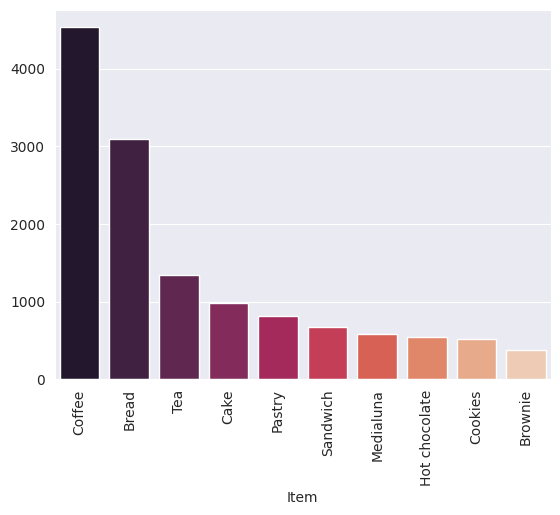

In [ ]:
x = df['Item'].value_counts().sort_values(ascending=False)[:10]
top_10_items = x.index
sns.set_style('darkgrid')
sns.barplot(x = x.index, y= x.values, palette='rocket')
plt.xticks(rotation=90)
plt.show()

# Apriori

In [ ]:
def encoder(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

apriori_data = df.groupby(['Transaction','Item'])['Item'].count().reset_index(name ='Count')
apriori_basket = apriori_data.pivot_table(index = 'Transaction', columns = 'Item', values = 'Count', aggfunc = 'sum').fillna(0)
apriori_basket_set = apriori_basket.applymap(encoder)
apriori_basket_set

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9682,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Frequency

In [ ]:
def calc_f_items(min_support = 0):
  frequency = apriori(apriori_basket_set, min_support = min_support, use_colnames = True)
  print(f"{frequency.round(2).sort_values('support', ascending=False)}")
  return frequency

In [ ]:
f_items_005 = calc_f_items(0.05)

    support         itemsets
2      0.48         (Coffee)
0      0.33          (Bread)
8      0.14            (Tea)
1      0.10           (Cake)
6      0.09         (Pastry)
9      0.09  (Bread, Coffee)
7      0.07       (Sandwich)
4      0.06  (Hot chocolate)
5      0.06      (Medialuna)
3      0.05        (Cookies)
10     0.05   (Coffee, Cake)


In [ ]:
f_items_001 = calc_f_items(0.01)

    support                  itemsets
6      0.48                  (Coffee)
2      0.33                   (Bread)
26     0.14                     (Tea)
4      0.10                    (Cake)
19     0.09                  (Pastry)
..      ...                       ...
54     0.01  (Coffee, Spanish Brunch)
57     0.01           (Tea, Sandwich)
58     0.01     (Bread, Cake, Coffee)
59     0.01   (Bread, Coffee, Pastry)
60     0.01       (Tea, Coffee, Cake)

[61 rows x 2 columns]


## Rules

In [ ]:
def apriori_rules(f_items, chosen_metric, chosen_min_threshold):
  rules = association_rules(f_items, metric = chosen_metric, min_threshold = chosen_min_threshold)
  selected_rules = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
  print(f"frequency: {min(f_items['support']):.2f}, metric: {chosen_metric}, min threshold: {chosen_min_threshold}\n" )
  print(f"{selected_rules.round(2).sort_values(chosen_metric, ascending=False)}")
  return rules

### support

In [ ]:
rules_f_005_support_005 = apriori_rules(f_items_005, 'support', 0.05)

frequency: 0.05, metric: support, min threshold: 0.05

  antecedents consequents  support  confidence  lift
0     (Bread)    (Coffee)     0.09        0.28  0.58
1    (Coffee)     (Bread)     0.09        0.19  0.58
2    (Coffee)      (Cake)     0.05        0.11  1.10
3      (Cake)    (Coffee)     0.05        0.53  1.10


In [ ]:
rules_f_001_support_001 = apriori_rules(f_items_001, 'support', 0.01)

frequency: 0.01, metric: support, min threshold: 0.01

       antecedents     consequents  support  confidence  lift
9         (Coffee)         (Bread)     0.09        0.19  0.58
8          (Bread)        (Coffee)     0.09        0.28  0.58
41        (Pastry)        (Coffee)     0.05        0.55  1.15
40        (Coffee)        (Pastry)     0.05        0.10  1.15
51        (Coffee)           (Tea)     0.05        0.10  0.73
..             ...             ...      ...         ...   ...
69     (Tea, Cake)        (Coffee)     0.01        0.42  0.88
70  (Coffee, Cake)           (Tea)     0.01        0.18  1.29
71           (Tea)  (Coffee, Cake)     0.01        0.07  1.29
72        (Coffee)     (Tea, Cake)     0.01        0.02  0.88
73          (Cake)   (Tea, Coffee)     0.01        0.10  1.94

[74 rows x 5 columns]


### confidence

In [ ]:
rules_f_005_confidence_02 = apriori_rules(f_items_005, 'confidence', 0.2)

frequency: 0.05, metric: confidence, min threshold: 0.2

  antecedents consequents  support  confidence  lift
1      (Cake)    (Coffee)     0.05        0.53  1.10
0     (Bread)    (Coffee)     0.09        0.28  0.58


In [ ]:
rules_f_001_confidence_05 = apriori_rules(f_items_001, 'confidence', 0.5)

frequency: 0.01, metric: confidence, min threshold: 0.5

         antecedents consequents  support  confidence  lift
10           (Toast)    (Coffee)     0.02        0.70  1.47
9   (Spanish Brunch)    (Coffee)     0.01        0.60  1.25
5        (Medialuna)    (Coffee)     0.04        0.57  1.19
6           (Pastry)    (Coffee)     0.05        0.55  1.15
0        (Alfajores)    (Coffee)     0.02        0.54  1.13
7         (Sandwich)    (Coffee)     0.04        0.53  1.11
1             (Cake)    (Coffee)     0.05        0.53  1.10
4            (Juice)    (Coffee)     0.02        0.53  1.12
2          (Cookies)    (Coffee)     0.03        0.52  1.08
8            (Scone)    (Coffee)     0.02        0.52  1.09
3    (Hot chocolate)    (Coffee)     0.03        0.51  1.06


### lift

In [ ]:
rules_f_005_lift_1 = apriori_rules(f_items_005, 'lift', 1)

frequency: 0.05, metric: lift, min threshold: 1

  antecedents consequents  support  confidence  lift
0    (Coffee)      (Cake)     0.05        0.11   1.1
1      (Cake)    (Coffee)     0.05        0.53   1.1


In [ ]:
rules_f_001_lift_1 = apriori_rules(f_items_001, 'lift', 1)

frequency: 0.01, metric: lift, min threshold: 1

         antecedents       consequents  support  confidence  lift
38     (Tea, Coffee)            (Cake)     0.01        0.20  1.94
41            (Cake)     (Tea, Coffee)     0.01        0.10  1.94
9             (Cake)   (Hot chocolate)     0.01        0.11  1.88
8    (Hot chocolate)            (Cake)     0.01        0.20  1.88
11            (Cake)             (Tea)     0.02        0.23  1.60
10             (Tea)            (Cake)     0.02        0.17  1.60
31           (Toast)          (Coffee)     0.02        0.70  1.47
30          (Coffee)           (Toast)     0.02        0.05  1.47
36   (Bread, Coffee)          (Pastry)     0.01        0.12  1.44
37          (Pastry)   (Bread, Coffee)     0.01        0.13  1.44
32             (Tea)        (Sandwich)     0.01        0.10  1.40
33        (Sandwich)             (Tea)     0.01        0.20  1.40
40             (Tea)    (Coffee, Cake)     0.01        0.07  1.29
39    (Coffee, Cake)       

## Рекомендации

In [ ]:
def get_recommendations(item, metric, rules, top_n=5):
    item_rules = rules[rules['antecedents'].apply(lambda x: item in x)]

    if len(item_rules) == 0:
        return pd.DataFrame()

    recommendations = []
    for _, rule in item_rules.iterrows():
        for consequent in rule['consequents']:
            if consequent != item:
                recommendations.append({
                    'item': consequent,
                    'confidence': rule['confidence'],
                    'lift': rule['lift'],
                    'support': rule['support']
                })

    if not recommendations:
        return pd.DataFrame()

    rec_df = pd.DataFrame(recommendations)
    rec_df = rec_df.groupby('item').agg({
        'confidence': 'max',
        'lift': 'max',
        'support': 'max'
    }).reset_index()

    rec_df = rec_df.sort_values(metric, ascending=False).head(top_n)

    return rec_df

In [ ]:
print(top_10_items)

Index(['Coffee', 'Bread', 'Tea', 'Cake', 'Pastry', 'Sandwich', 'Medialuna',
       'Hot chocolate', 'Cookies', 'Brownie'],
      dtype='object', name='Item')


In [ ]:
items = ['Coffee', 'Cake', 'Bread']

In [ ]:
for item in items:
  print(f"Рекомендации для {item} по правилам rules_f_001_support_001")
  print(f"{get_recommendations(item, 'confidence', rules_f_001_support_001)}\n")

Рекомендации для Coffee по правилам rules_f_001_support_001
        item  confidence      lift   support
1      Bread    0.235556  0.898557  0.090016
3       Cake    0.201271  1.937977  0.054728
14       Tea    0.183398  1.285822  0.049868
9     Pastry    0.124413  1.444872  0.047544
10  Sandwich    0.079947  1.112792  0.038246

Рекомендации для Cake по правилам rules_f_001_support_001
            item  confidence      lift   support
1         Coffee    0.526958  1.937977  0.054728
3            Tea    0.228891  1.937977  0.023772
0          Bread    0.224822  1.073621  0.023349
2  Hot chocolate    0.109868  1.883874  0.011410

Рекомендации для Bread по правилам rules_f_001_support_001
       item  confidence      lift   support
3    Coffee    0.429864  0.898557  0.090016
7    Pastry    0.124413  1.444872  0.029160
2      Cake    0.111502  1.073621  0.023349
9       Tea    0.085890  0.602181  0.028104
8  Sandwich    0.051986  0.723596  0.017010



In [ ]:
for item in items:
  print(f"Рекомендации для {item} по правилам rules_f_001_confidence_05")
  print(f"{get_recommendations(item, 'confidence', rules_f_001_confidence_05)}\n")

Рекомендации для Coffee по правилам rules_f_001_confidence_05
Empty DataFrame
Columns: []
Index: []

Рекомендации для Cake по правилам rules_f_001_confidence_05
     item  confidence      lift   support
0  Coffee    0.526958  1.101515  0.054728

Рекомендации для Bread по правилам rules_f_001_confidence_05
Empty DataFrame
Columns: []
Index: []



In [ ]:
for item in items:
  print(f"Рекомендации для {item} по правилам rules_f_001_lift_1")
  print(f"{get_recommendations(item, 'confidence', rules_f_001_lift_1)}\n")

Рекомендации для Coffee по правилам rules_f_001_lift_1
         item  confidence      lift   support
2        Cake    0.201271  1.937977  0.054728
12        Tea    0.183398  1.285822  0.010037
8      Pastry    0.124413  1.444872  0.047544
9    Sandwich    0.079947  1.112792  0.038246
6   Medialuna    0.073542  1.189878  0.035182

Рекомендации для Cake по правилам rules_f_001_lift_1
            item  confidence      lift   support
1         Coffee    0.526958  1.937977  0.054728
3            Tea    0.228891  1.937977  0.023772
2  Hot chocolate    0.109868  1.883874  0.011410
0          Bread    0.096643  1.073621  0.010037

Рекомендации для Bread по правилам rules_f_001_lift_1
     item  confidence      lift   support
1  Pastry    0.124413  1.444872  0.029160
0    Cake    0.111502  1.073621  0.010037



# Slope One

In [ ]:
def create_user_item_matrix(df):
    user_item = df.groupby(['Transaction', 'Item']).size().unstack(fill_value=0)
    return user_item

user_item_matrix = create_user_item_matrix(df)
user_item_matrix

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9682,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
class slopeOne:
    def __init__(self):
        self.diffs = {}
        self.freqs = {}

    def fit(self, user_item_matrix):
        n_items = len(user_item_matrix.columns)
        items = user_item_matrix.columns

        for i in range(n_items):
            for j in range(i+1, n_items):
                item1, item2 = items[i], items[j]

                common_users = ((user_item_matrix[item1] > 0) & (user_item_matrix[item2] > 0))

                if common_users.sum() > 0:
                    diff = (user_item_matrix.loc[common_users, item1] -
                           user_item_matrix.loc[common_users, item2]).mean()

                    self.diffs[(item1, item2)] = diff
                    self.diffs[(item2, item1)] = -diff
                    self.freqs[(item1, item2)] = common_users.sum()
                    self.freqs[(item2, item1)] = common_users.sum()

        return self

    def predict_for_item(self, target_item, user_item_matrix, top_n=5):
        predictions = {}

        for item in user_item_matrix.columns:
            if item != target_item:
                key = (target_item, item)
                if key in self.diffs:
                    target_users = user_item_matrix[user_item_matrix[target_item] > 0].index

                    if len(target_users) > 0:
                        sample_user = target_users[0]
                        user_rating = user_item_matrix.loc[sample_user, target_item]

                        predicted_rating = user_rating + self.diffs[key]
                        confidence = self.freqs[key] / len(target_users)

                        predictions[item] = predicted_rating * confidence

        sorted_predictions = sorted(predictions.items(), key=lambda x: x[1], reverse=True)
        return sorted_predictions[:top_n]

In [ ]:
slope = slopeOne()
slope.fit(user_item_matrix)

## Рекомендации

In [ ]:
for item in items:
  print(f"\nРекомендации для {item} по правилам SlopeOne")
  slope_recs = slope.predict_for_item(item, user_item_matrix, top_n=5)
  for rec_item, score in slope_recs:
      print(f"{rec_item}: {score:.2f}")



Рекомендации для Coffee по правилам SlopeOne
Bread: 0.19
Cake: 0.11
Tea: 0.10
Pastry: 0.10
Sandwich: 0.08

Рекомендации для Cake по правилам SlopeOne
Coffee: 0.53
Tea: 0.23
Bread: 0.22
Hot chocolate: 0.11
Cookies: 0.07

Рекомендации для Bread по правилам SlopeOne
Coffee: 0.28
Pastry: 0.09
Tea: 0.09
Cake: 0.07
Sandwich: 0.05


# Сравнение рекомендаций

In [ ]:
def combine_recommendations(target_item, apriori_rules, slope_model, user_item_matrix, top_n=5):
    apriori_recs = get_recommendations(target_item, 'confidence', apriori_rules, top_n)
    slope_recs = slope_model.predict_for_item(target_item, user_item_matrix, top_n)

    all_items = set()

    apriori_items = {}
    if not apriori_recs.empty:
        for _, row in apriori_recs.iterrows():
            item = row['item']
            all_items.add(item)
            apriori_items[item] = {
                'confidence': round(row['confidence'], 2),
                'lift': round(row['lift'], 2),
                'support': round(row['support'], 2)
            }

    slope_items = {}
    for item, prob in slope_recs:
        all_items.add(item)
        slope_items[item] = round(prob, 2) if prob is not None else '-'

    combined_data = []
    for item in all_items:
        row = {
            'item': item,
            'confidence': apriori_items.get(item, {}).get('confidence', '-'),
            'lift': apriori_items.get(item, {}).get('lift', '-'),
            'support': apriori_items.get(item, {}).get('support', '-'),
            'slopeone': slope_items.get(item, '-')
        }
        combined_data.append(row)

    combined_df = pd.DataFrame(combined_data)
    combined_df['sort_key'] = combined_df['slopeone'].apply(lambda x: x if x != '-' else -1)
    combined_df = combined_df.sort_values('sort_key', ascending=False)
    combined_df = combined_df.drop('sort_key', axis=1)

    return combined_df

In [ ]:
print("Рекомендации для Coffee (Apriori - rules_f_001_lift_1, SlopeOne) ")
coffee_combined_req = combine_recommendations('Coffee', rules_f_001_lift_1, slope, user_item_matrix)
coffee_combined_req

Рекомендации для Coffee (Apriori - rules_f_001_lift_1, SlopeOne) 


,item,confidence,lift,support,slopeone
4,Bread,-,-,-,0.19
0,Cake,0.2,1.94,0.05,0.11
1,Pastry,0.12,1.44,0.05,0.1
3,Tea,0.18,1.29,0.01,0.1
5,Sandwich,0.08,1.11,0.04,0.08
2,Medialuna,0.07,1.19,0.04,-


In [ ]:
print("Рекомендации для Cake (Apriori - rules_f_001_lift_1, SlopeOne)")
cake_combined_req = combine_recommendations('Cake', rules_f_001_lift_1, slope, user_item_matrix)
cake_combined_req

Рекомендации для Cake (Apriori - rules_f_001_lift_1, SlopeOne)


,item,confidence,lift,support,slopeone
0,Coffee,0.53,1.94,0.05,0.53
3,Tea,0.23,1.94,0.02,0.23
4,Bread,0.1,1.07,0.01,0.22
1,Hot chocolate,0.11,1.88,0.01,0.11
2,Cookies,-,-,-,0.07


In [ ]:
print("Рекомендации для Bread (Apriori - rules_f_001_lift_1, SlopeOne)")
bread_combined_req = combine_recommendations('Bread', rules_f_001_lift_1, slope, user_item_matrix)
bread_combined_req

Рекомендации для Bread (Apriori - rules_f_001_lift_1, SlopeOne)


,item,confidence,lift,support,slopeone
0,Coffee,-,-,-,0.28
2,Pastry,0.12,1.44,0.03,0.09
3,Tea,-,-,-,0.09
1,Cake,0.11,1.07,0.01,0.07
4,Sandwich,-,-,-,0.05
